In [1]:
using SDEs
using Compat, BenchmarkTools
include("../test/setup.jl")
include("../test/test_utils.jl")
using PyPlot

check (generic function with 2 methods)

In [2]:
prob

Problem31([0.8, 0.4, 0.9, 0.4, 0.2, 0.21, 0.6, 0.43, 0.21, -0.1])

In [3]:
x0'

1×10 RowVector{Float64,Array{Float64,1}}:
 -0.5  0.5  0.3  -0.2  0.7  0.85  0.0  -0.3  -0.34  0.62

In [178]:
Ncheck = 100
Nlist = Int.(round.(logspace(1, 3.5, 20)));

em_dev = []
pce1_dev = []
pce2_dev = []
pce3_dev = []
for Npoints in Nlist
    t = linspace(0, 1, Npoints+1)
    push!(em_dev, check(prob, x0, linspace(0,1.,Npoints), EM(), 1:Ncheck))
    push!(pce1_dev, check(prob, x0, linspace(0,1.,Npoints), PCE(), 1:Ncheck; θ=0.5, η=0.25))
    push!(pce2_dev, check(prob, x0, linspace(0,1.,Npoints), PCE(), 1:Ncheck; θ=0.5, η=0.5))
    push!(pce3_dev, check(prob, x0, linspace(0,1.,Npoints), PCE(), 1:Ncheck; θ=0.5, η=0.75))
end

Plots shows that an $\eta=0.5$ is the best value as the scaling is linear.
Things are not a strong function $\theta$ as order is limited due to the diffusion term.

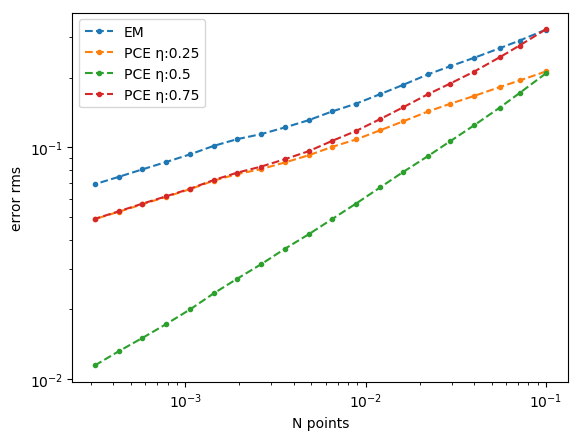

PyObject <matplotlib.legend.Legend object at 0x13f991f50>

In [182]:
loglog(1./Nlist, em_dev, ".--", label="EM")
loglog(1./Nlist, pce1_dev, ".--", label="PCE η:0.25")
loglog(1./Nlist, pce2_dev, ".--", label="PCE η:0.5")
loglog(1./Nlist, pce3_dev, ".--", label="PCE η:0.75")
xlabel("N points")
ylabel("error rms")
legend()

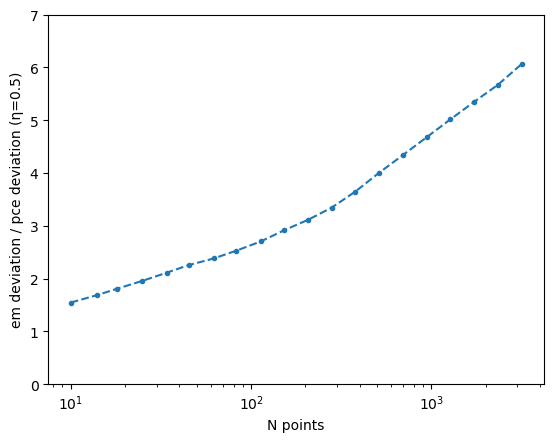

(0, 7)

In [186]:
semilogx(Nlist, em_dev./pce_dev, ".--")
ylabel("em deviation / pce deviation (η=0.5)")
xlabel("N points")
ylim([0,7])

In [169]:
Nmean = 5000

em_time = []
pce_time = []
for Npoints in Nlist
    t = linspace(0, 1, Npoints+1)
    push!(em_time, mean([@elapsed check(prob, x0, linspace(0,1.,Npoints), EM(), i) for i in 1:Nmean]))
    push!(pce_time, mean([@elapsed check(prob, x0, linspace(0,1.,Npoints), PCE(), i; θ=0.5, η=0.5) for i in 1:Nmean]))
end

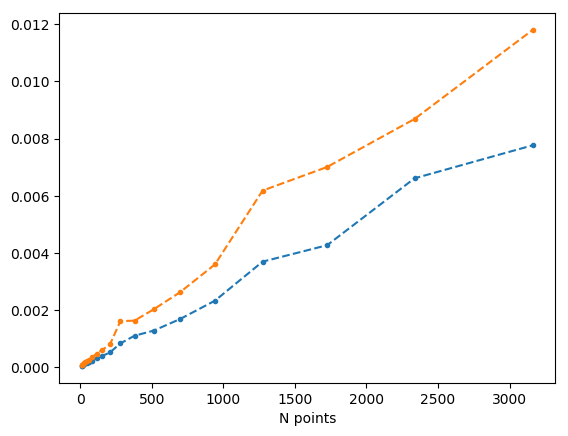

PyObject Text(0.5,24,u'N points')

In [184]:
plot(Nlist, em_time, ".--")
plot(Nlist, pce_time, ".--")
xlabel("N points")

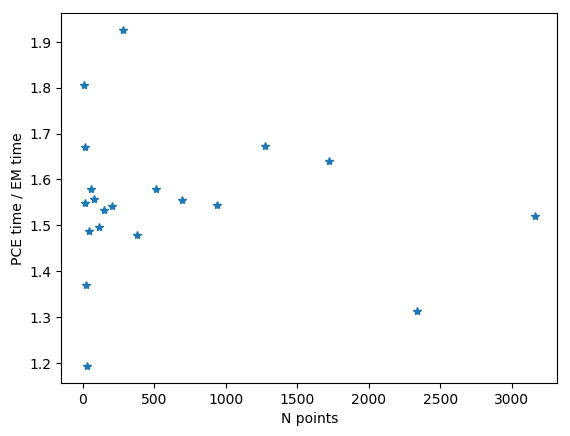

PyObject Text(0.5,24,u'N points')

In [185]:
plot(Nlist, pce_time./em_time, "*")
ylabel("PCE time / EM time")
xlabel("N points")